In [ ]:
#必要なライブラリをインストール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <font color = 'orange'> RankNetの予測精度検証

### 使用するデータ

- N個のsin関数データをMステップ分生成

$$ f_{i}(t) = i \sin( t \times 0.1 \pi),  (i = 1,2, \cdots N,  t = 1,2,\cdots M)$$

- sin関数のデータセット：df_test
- リターンを計算したデータセット:df_test_raw_return
- リターンをランク付したデータセット:df_test_raw_return_rank

In [ ]:
#Nを指定
N = 20
#Mを指定
M = 200

df_test = pd.DataFrame([])
for i in range(1,N+1):
  df_test[str(i) + 'sin_t_pi'] = i * np.sin(np.array(range(1,M+1,1)) * 0.1 * np.pi)

In [ ]:
display(df_test)

,1sin_t_pi,2sin_t_pi,3sin_t_pi,4sin_t_pi,5sin_t_pi,6sin_t_pi,7sin_t_pi,8sin_t_pi,9sin_t_pi,10sin_t_pi,11sin_t_pi,12sin_t_pi,13sin_t_pi,14sin_t_pi,15sin_t_pi,16sin_t_pi,17sin_t_pi,18sin_t_pi,19sin_t_pi,20sin_t_pi
0,3.090170e-01,6.180340e-01,9.270510e-01,1.236068e+00,1.545085e+00,1.854102e+00,2.163119e+00,2.472136e+00,2.781153e+00,3.090170e+00,3.399187e+00,3.708204e+00,4.017221e+00,4.326238e+00,4.635255e+00,4.944272e+00,5.253289e+00,5.562306e+00,5.871323e+00,6.180340e+00
1,5.877853e-01,1.175571e+00,1.763356e+00,2.351141e+00,2.938926e+00,3.526712e+00,4.114497e+00,4.702282e+00,5.290067e+00,5.877853e+00,6.465638e+00,7.053423e+00,7.641208e+00,8.228994e+00,8.816779e+00,9.404564e+00,9.992349e+00,1.058013e+01,1.116792e+01,1.175571e+01
2,8.090170e-01,1.618034e+00,2.427051e+00,3.236068e+00,4.045085e+00,4.854102e+00,5.663119e+00,6.472136e+00,7.281153e+00,8.090170e+00,8.899187e+00,9.708204e+00,1.051722e+01,1.132624e+01,1.213525e+01,1.294427e+01,1.375329e+01,1.456231e+01,1.537132e+01,1.618034e+01
3,9.510565e-01,1.902113e+00,2.853170e+00,3.804226e+00,4.755283e+00,5.706339e+00,6.657396e+00,7.608452e+00,8.559509e+00,9.510565e+00,1.046162e+01,1.141268e+01,1.236373e+01,1.331479e+01,1.426585e+01,1.521690e+01,1.616796e+01,1.711902e+01,1.807007e+01,1.902113e+01
4,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,2.000000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-9.510565e-01,-1.902113e+00,-2.853170e+00,-3.804226e+00,-4.755283e+00,-5.706339e+00,-6.657396e+00,-7.608452e+00,-8.559509e+00,-9.510565e+00,-1.046162e+01,-1.141268e+01,-1.236373e+01,-1.331479e+01,-1.426585e+01,-1.521690e+01,-1.616796e+01,-1.711902e+01,-1.807007e+01,-1.902113e+01
196,-8.090170e-01,-1.618034e+00,-2.427051e+00,-3.236068e+00,-4.045085e+00,-4.854102e+00,-5.663119e+00,-6.472136e+00,-7.281153e+00,-8.090170e+00,-8.899187e+00,-9.708204e+00,-1.051722e+01,-1.132624e+01,-1.213525e+01,-1.294427e+01,-1.375329e+01,-1.456231e+01,-1.537132e+01,-1.618034e+01
197,-5.877853e-01,-1.175571e+00,-1.763356e+00,-2.351141e+00,-2.938926e+00,-3.526712e+00,-4.114497e+00,-4.702282e+00,-5.290067e+00,-5.877853e+00,-6.465638e+00,-7.053423e+00,-7.641208e+00,-8.228994e+00,-8.816779e+00,-9.404564e+00,-9.992349e+00,-1.058013e+01,-1.116792e+01,-1.175571e+01
198,-3.090170e-01,-6.180340e-01,-9.270510e-01,-1.236068e+00,-1.545085e+00,-1.854102e+00,-2.163119e+00,-2.472136e+00,-2.781153e+00,-3.090170e+00,-3.399187e+00,-3.708204e+00,-4.017221e+00,-4.326238e+00,-4.635255e+00,-4.944272e+00,-5.253289e+00,-5.562306e+00,-5.871323e+00,-6.180340e+00


### データの可視化

- N個のsin関数が確認できる。

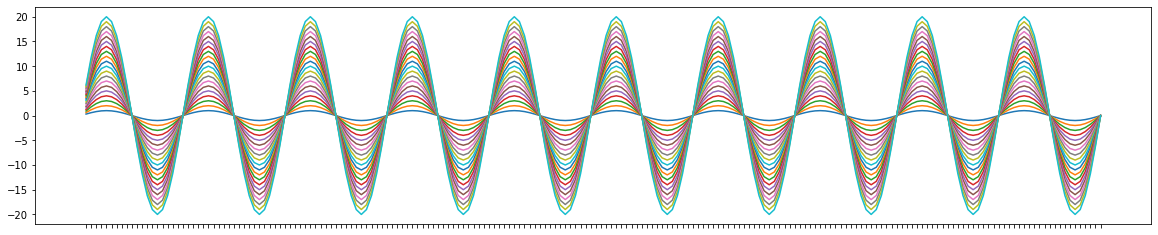

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(df_test.index, df_test)
ax.set_xticks(df_test.index)
ax.tick_params(labelbottom=False)
plt.show()

### リターンの計算

- 新しく df_test_raw_return を作成。
- Rt個先のデータとの変化量を Rt_raw_return とする。

In [ ]:
#Rtを指定
#1ヶ月を想定して31とする。
Rt = 31 

df_test_raw_return = df_test.shift(-Rt) - df_test
df_test_raw_return.columns = df_test_raw_return.columns + '_Rt_raw_return'

#nanを削除
df_test_raw_return = df_test_raw_return.dropna()

### リターンのランク付

- データセットを横向きにビンニングする関数を作成する。

In [ ]:
#横向きにビンニングする関数
def make_rank_dataset(df, bin_list):
  df_rank = pd.DataFrame([])
  index = df.index
  df = df.T
  for i in index:
    df_rank['rank' + str(i)]  = pd.qcut(df[i], len(bin_list), labels=bin_list)
  df_rank = df_rank.T
  df_rank.index = index
  df_rank.columns = df_rank.columns + '_rank'
  return df_rank


#10段階評価でビンを作成
bin_list = np.array(range(1,11,1))
df_test_raw_return_rank = make_rank_dataset(df_test_raw_return, bin_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


### データの可視化

- 各リターンの遷移を可視化

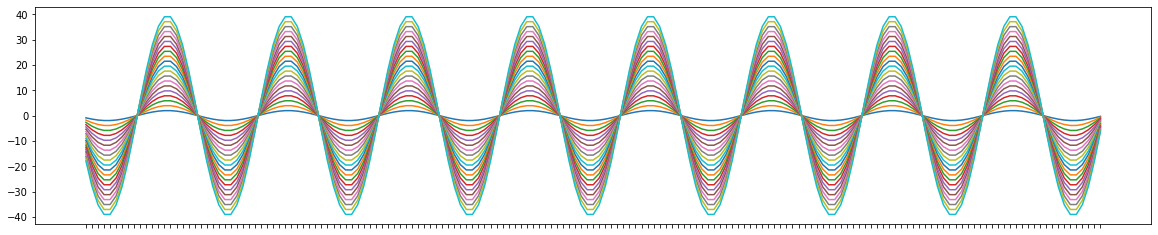

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(df_test_raw_return.index, df_test_raw_return)
ax.set_xticks(df_test_raw_return.index)
ax.tick_params(labelbottom=False)
plt.show()

- $f_{20}(t)$と$f_{20}(t)$のリターンを可視化

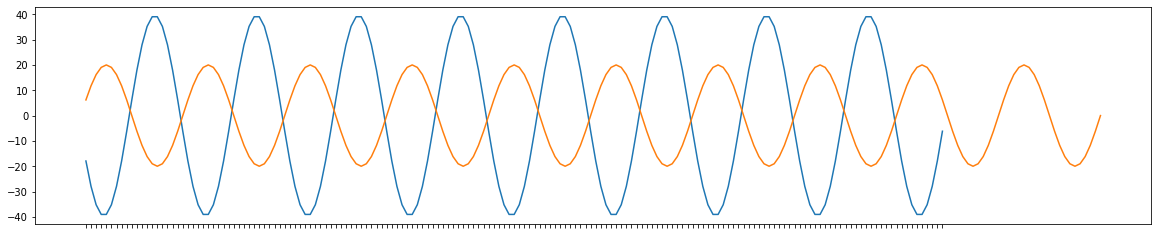

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(df_test_raw_return.index, df_test_raw_return['20sin_t_pi_Rt_raw_return'])
ax.plot(df_test.index , df_test['20sin_t_pi'])
ax.set_xticks(df_test_raw_return.index)
ax.tick_params(labelbottom=False)
plt.show()

- $f_{20}(t)$のリターンと$f_{5}(t)$のリターンを可視化

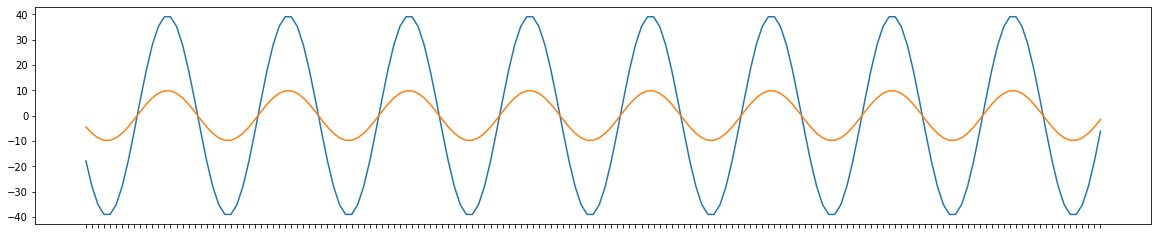

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(df_test_raw_return.index, df_test_raw_return['20sin_t_pi_Rt_raw_return'])
ax.plot(df_test_raw_return.index, df_test_raw_return['5sin_t_pi_Rt_raw_return'])
ax.set_xticks(df_test_raw_return.index)
ax.tick_params(labelbottom=False)
plt.show()

- $f_{20}(t)$のリターンのランクと$f_{5}(t)$のリターンのランクを可視化

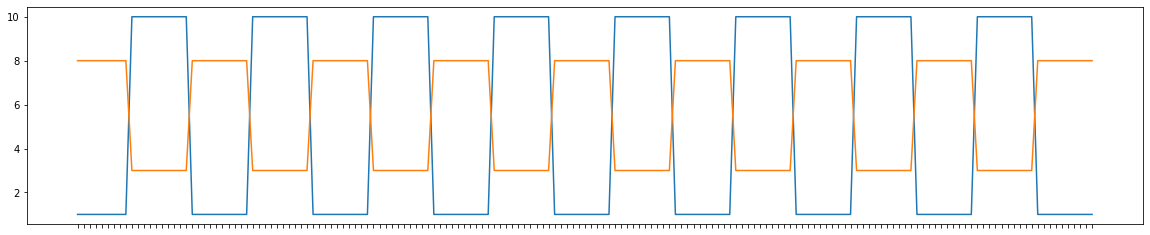

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(df_test_raw_return_rank.index, df_test_raw_return_rank['20sin_t_pi_Rt_raw_return_rank'])
ax.plot(df_test_raw_return_rank.index, df_test_raw_return_rank['5sin_t_pi_Rt_raw_return_rank'])
ax.set_xticks(df_test_raw_return_rank.index)
ax.tick_params(labelbottom=False)
plt.show()

- ランク付けが上手くできていることを確認した。

### 特徴量の生成

- 特徴量を3種類に分けて計算する。

1. 各銘柄単体の過去の時系列から算出される特徴量  
2. 銘柄の過去のリターンのランキングから算出される特徴量  
3. 1と2を用いて算出される特徴量

In [ ]:
#Rt日前からのリターンを計算する関数
def make_raw_return(df, Rt):
  df_raw_return = df.shift(Rt) - df
  df_raw_return.columns = df_raw_return.columns + '_' + str(Rt) + '_raw_return'
  return df_raw_return

In [ ]:
#特徴量データセットを作成する関数
#入力1：sin関数のデータセット：df_test
def make_features1(df1):
  #31日前からのリターン
  df1_f1 = make_raw_return(df1, 31)
  #62日前からのリターン
  df1_f2 = make_raw_return(df1, 62)
  #93日前からのリターン
  df1_f3 = make_raw_return(df1, 93)
  return df1_f3


#def make_features2():
#def make_features3():

In [ ]:
#特徴量データセットを作成する関数
#入力：(時系列データセット,特徴量を生成するカラム）
#出力：特徴量データセット、特徴量名リスト
def make_features(df, columns):
  #特徴量用のデータセットを作成
  df_f = pd.DataFrame([])
  #特徴量名を格納するリストを作成
  df_f_list = []

  #過去Rt日のrawリターン
  for Rt in [31]:
    df_f[columns + '_past_' + str(Rt) + '_return'] = make_raw_return(df, Rt)
    #特徴量名を格納
    df_f_list.append('_past_' + str(Rt) + '_return')

  #過去Rt日のrawリターンのランク
  for Rt in [31]:
    #10段階評価でビンを作成
    bin_list = np.array(range(1,11,1))
    #過去Rt日のrawリターンを使ってランク付
    df_f = df_f.dropna()
    df_f[columns + '_past_' + str(Rt) + '_return_rank'] = make_rank_dataset(df_f[columns + '_past_' + str(Rt) + '_return'] , bin_list)
    #特徴量名を格納
    df_f_list.append('_past_' + str(Rt) + '_return_rank')

  return df_f, df_f_list

In [ ]:
df_f, df_f_list = make_features(df_test, df_test.columns)
print(df_f_list)

['_past_31_return', '_past_31_return_rank']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


- 各$f_{i}(t)$のリターンのランクを可視化

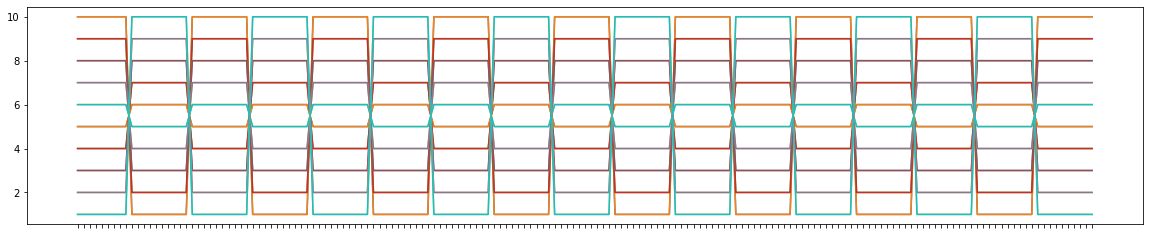

In [ ]:
fig, ax = plt.subplots(figsize = (20,4))
for i in range(1, N+1):
  ax.plot(df_test_raw_return_rank.index, df_test_raw_return_rank[str(i) + 'sin_t_pi_Rt_raw_return_rank'])
ax.set_xticks(df_test_raw_return_rank.index)
ax.tick_params(labelbottom=False)
plt.show()

- 過去時系列を用いた特徴量の生成を確認した。

### インプットデータの作成

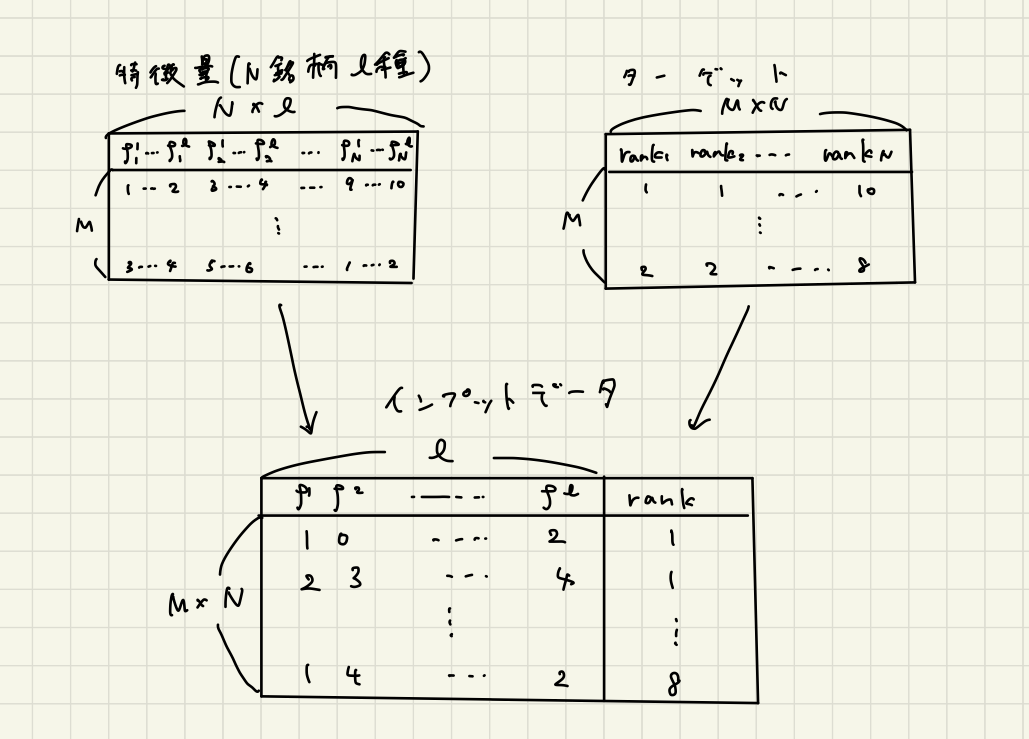

In [ ]:
df_t_list = ['_Rt_raw_return_rank']
df_input_columns = df_f_list + df_t_list

#インプットデータを保存するデータフレーム
df_input = pd.DataFrame([],columns = df_input_columns )
for symbol in df_test.columns:
  #各銘柄について一時的に保存するデータフレーム
  df_0 = pd.DataFrame([])
  for feature in df_f_list:
    #各特徴量を格納、横方向に結合
    df_0 = pd.concat([df_0, df_f[symbol + feature]] ,axis = 1)
  for target in df_t_list:
    #ターゲットを追加、横方向に結合
    df_0 = pd.concat([df_0, df_test_raw_return_rank[symbol + target]], axis = 1)
  #特徴量とターゲットはインデックスがずれるので補正
  df_0 = df_0.dropna()
  #インプットデータに追加、縦方向に結合
  #結合前に列名を統一しないと新しい列が生成されてしまう
  df_0.columns = df_input.columns
  #インプットデータに縦結合
  df_input = pd.concat([df_input, df_0],  axis = 0)

#indexのリセット
df_input = df_input.reset_index(drop = True)
display(df_input)

,_past_31_return,_past_31_return_rank,_Rt_raw_return_rank
0,0.896802,1,1
1,1.396802,1,1
2,1.760074,1,1
3,1.951057,1,1
4,1.951057,1,1
...,...,...,...
2755,-39.021130,1,1
2756,-39.021130,1,1
2757,-35.201470,1,1
2758,-27.936045,1,1


### 学習モデル構築

In [ ]:
from itertools import combinations
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np   

### 損失関数について

- 交差エントロピー損失

$P_{i,j}$：銘柄$i$が銘柄$j$より大きい確率。$s_i$が非常に大きい場合、$P_{i,j}$は１に近づく

$$ P_{i,j} = \frac{1}{1 + \exp(-\sigma(s_i - s_j))}$$

損失関数として、交差エントロピー損失$C$を用いる。  
$\bar{P_{i,j}}$：真の確率分布

$$C = -\bar{P_{i,j}} \log P_{i,j} - (1 - \bar{P_{i,j}}) \log (1 - P_{i,j})$$


ここで、$S_{i,j}$を次のように定義する
$$
S_{i,j} = 
\left\{
\begin{array}{ll}
1 & 銘柄i > 銘柄j \\
-1 & 銘柄j > 銘柄i \\
0 & それ以外
\end{array}
\right.
$$

このとき、真の確率$\bar{P_{i,j}}$は


$$ \bar{P_{i,j}} = \frac{1}{2} (1 + S_{i,j}) $$

と表せ、損失関数Cは次のようになる

$$C = \frac{1}{2} (1 + S_{i,j}) \sigma (s_i - s_j) + \log (1 + \exp(-\sigma(s_i - s_j)))$$

In [ ]:
#RankNet
class Net(nn.Module):
    def __init__(self, D):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(D, 136)
        #self.sigmoid = nn.Sigmoid()
        self.ac1 = nn.Sigmoid()
        self.fc2 = nn.Linear(136, 272)
        self.ac2 = nn.ReLU()
        self.fc3 = nn.Linear(272, 34)
        self.ac3 = nn.ReLU()
        self.fc4 = nn.Linear(34, 1)
        self.dropout = nn.Dropout(0.8)

        self.l1 = nn.Linear(D, 2048)
        self.l2 = nn.Linear(2048, 1)
        self.dropout = nn.Dropout(0.8)

    def forward(self, x):
        #x = torch.sigmoid(self.l1(x))
        #x = self.dropout(x)
        #x = self.l2(x)

        #x = torch.sigmoid(self.fc1(x))
        x = self.fc1(x)
        #x = torch.sigmoid(x)
        #ReLU関数を使う場合は、sigmoid関数をはさんで0より大きくする必要がある
        #x = self.sigmoid(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.ac3(x)
        x = self.fc4(x)


        #h = self.ac1(self.fc1(x))
        #h = self.ac2(self.fc2(h))
        #out = self.fc3(h)
        return x

#損失関数の定義：交差エントロピー消失
def pairwise_loss(s_i, s_j, S_ij, sigma=1):
    C = torch.log1p(torch.exp(-sigma * (s_i - s_j)))
    if S_ij == -1:
        C += sigma * (s_i - s_j)
    elif S_ij == 0:
        C += 0.5 * sigma * (s_i - s_j)
    elif S_ij == 1:
        pass
    else:
        raise ValueError("S_ij: -1/0/1")
    return C

#精度評価：真の順序と予測の順序が逆の数
def swapped_pairs(ys_pred, ys_target):
    N = ys_target.shape[0]
    swapped = 0
    for i in range(N - 1):
        for j in range(i + 1, N):
            if ys_target[i] < ys_target[j]:
                if ys_pred[i] > ys_pred[j]:
                    swapped += 1
            elif ys_target[i] > ys_target[j]:
                if ys_pred[i] < ys_pred[j]:
                    swapped += 1
    return swapped


#精度評価2:NDCG
def ndcg(y_true, y_pred, k=None, powered=False):
    def dcg(scores, k=None, powered=False):
        if k is None:
            k = scores.shape[0]
        if not powered:
            ret = scores[0]
            for i in range(1, k):
                ret += scores[i] / np.log2(i + 1)
            return ret
        else:
            ret = 0
            for i in range(k):
                ret += (2 ** scores[i] - 1) / np.log2(i + 2)
            return ret
    
    ideal_sorted_scores = np.sort(y_true)[::-1]
    ideal_dcg_score = dcg(ideal_sorted_scores, k=k, powered=powered)
    
    pred_sorted_ind = np.argsort(y_pred)[::-1]
    pred_sorted_scores = y_true[pred_sorted_ind]
    dcg_score = dcg(pred_sorted_scores, k=k, powered=powered)
    
    return dcg_score / ideal_dcg_score

def ndcg1(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=False)

def ndcg2(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=True)

### インプットデータを学習データと評価データに分割する

- 80%を学習データ、20%を評価データとする

In [ ]:
train_dataset = df_input.loc[0:len(df_input)*0.8,:]
valid_dataset = df_input.loc[len(df_input)*0.8:, :].reset_index(drop = True)

In [ ]:
X_train = train_dataset[df_f_list]
ys_train = train_dataset[df_t_list]
X_valid = valid_dataset[df_f_list]
ys_valid = valid_dataset[df_t_list]

In [ ]:
#可視化
#display(X_train), display(ys_train), display(X_valid), display(ys_valid)

#tensorに変換
X_train = torch.tensor(X_train.values.astype(np.float32))
X_valid = torch.tensor(X_valid.values.astype(np.float32))
ys_train = torch.tensor(ys_train.values.astype(np.float32))
ys_valid = torch.tensor(ys_valid.values.astype(np.float32))

In [ ]:
#学習データの数
N_train = len(train_dataset)
#評価データの数
N_valid = len(valid_dataset)
#特徴量の数
D = len(df_f_list)

- 学習用の関数

In [ ]:
def train(X_train, ys_train):
  idx = torch.randperm(N_train)

  X_train = X_train[idx]
  ys_train = ys_train[idx]

  cur_batch = 0
  for it in range(N_train // batch_size):
      batch_X = X_train[cur_batch: cur_batch + batch_size]
      batch_ys = ys_train[cur_batch: cur_batch + batch_size]
      cur_batch += batch_size

      opt.zero_grad()
      batch_loss = torch.zeros(1)
      if len(batch_X) > 0:
          #batch_pred = net(batch_X)
          batch_pred = net(batch_X.float())

          # sampling pairs from batch
          for _ in range(n_sampling_combs):
              i, j = np.random.choice(range(batch_size), 2)
              s_i = batch_pred[i]
              s_j = batch_pred[j]
              if batch_ys[i] > batch_ys[j]:
                  S_ij = 1
              elif batch_ys[i] == batch_ys[j]:
                  S_ij = 0
              else:
                  S_ij = -1
              loss = pairwise_loss(s_i, s_j, S_ij)
              batch_loss += loss

      batch_loss.backward(retain_graph=True)
      opt.step()

- 評価用の関数

In [ ]:
def valid(X_valid, ys_valid):
  with torch.no_grad():
    valid_pred = net(X_valid.float())
    valid_swapped_pairs = swapped_pairs(valid_pred, ys_valid)
    print(f"epoch: {epoch + 1} valid swapped pairs: {valid_swapped_pairs}/{N_valid * (N_valid - 1) // 2}")

- 予測精度の確認

In [ ]:
epochs = 1000
batch_size = 256
n_sampling_combs = 50

net = Net(D)
opt = optim.Adam(net.parameters())
for epoch in range(epochs):  
  train(X_train, ys_train)
  if epoch % 200 ==0:
    valid(X_valid, ys_valid)

epoch: 1 valid swapped pairs: 59581/152076
epoch: 201 valid swapped pairs: 7667/152076
epoch: 401 valid swapped pairs: 7654/152076
epoch: 601 valid swapped pairs: 9993/152076
epoch: 801 valid swapped pairs: 9993/152076
